# 분석시나리오 7

# Step0. Import

In [1]:
import platform

from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import math

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

%matplotlib inline
plt.rcParams["figure.figsize"] = [12,6]

# Step1. 개인 신용카드 업종별 매출비중

In [2]:
# %pwd

In [3]:
# %ls data\*.xlsx

In [4]:
# 엑셀파일 불러오기
data_card_xls = 'data\data_card.xlsx'

In [5]:
card_df = pd.read_excel(data_card_xls)
card_df.head()

,통계표,지역코드,소비유형코드,금액구분코드,단위,변환,2019/01,2019/02,2019/03,2019/04,...,2021/03,2021/04,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12
0,7.5.2. 지역별 소비유형별 개인 신용카드,전국,합계,총액,백만원,원자료,44936072,38921767,44496876,43591233,...,49869479,48970480,51219562,50209911,52583282,50076065,50710469,53469616,53827378,53993508
1,7.5.2. 지역별 소비유형별 개인 신용카드,전국,종합소매,총액,백만원,원자료,6717820,6046211,6697911,6616299,...,6968391,6745233,7435797,6898086,7002567,7310362,7484689,7404979,7507863,7299173
2,7.5.2. 지역별 소비유형별 개인 신용카드,전국,백화점,총액,백만원,원자료,1259884,1145085,1351477,1279599,...,1482206,1366821,1550293,1332067,1195312,1269703,1485330,1720790,1780818,1650980
3,7.5.2. 지역별 소비유형별 개인 신용카드,전국,대형마트/유통전문점,총액,백만원,원자료,2656679,2402706,2609639,2551294,...,2904229,2797917,3121936,2845178,2968141,3102625,3108158,2928618,2988072,2923811
4,7.5.2. 지역별 소비유형별 개인 신용카드,전국,슈퍼마켓,총액,백만원,원자료,1958044,1746519,1870629,1892572,...,1700329,1695685,1822409,1757707,1856760,1931481,1910003,1763608,1762762,1775922


In [6]:
# card_df.columns

In [7]:
# card_df['소비유형코드'].replace(' ','',inplace=True)

In [8]:
card_df['2019'] = card_df['2019/01'] + card_df['2019/02'] + card_df['2019/03'] + card_df['2019/04'] + card_df['2019/05'] + card_df['2019/06'] + card_df['2019/07'] + card_df['2019/08'] + card_df['2019/09'] + card_df['2019/10'] + card_df['2019/11'] + card_df['2019/12']
card_df['2020'] = card_df['2020/01'] + card_df['2020/02'] + card_df['2020/03'] + card_df['2020/04'] + card_df['2020/05'] + card_df['2020/06'] + card_df['2020/07'] + card_df['2020/08'] + card_df['2020/09'] + card_df['2020/10'] + card_df['2020/11'] + card_df['2020/12']
card_df['2021'] = card_df['2021/01'] + card_df['2021/02'] + card_df['2021/03'] + card_df['2021/04'] + card_df['2021/05'] + card_df['2021/06'] + card_df['2021/07'] + card_df['2021/08'] + card_df['2021/09'] + card_df['2021/10'] + card_df['2021/11'] + card_df['2021/12']
card_df

,통계표,지역코드,소비유형코드,금액구분코드,단위,변환,2019/01,2019/02,2019/03,2019/04,...,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2019,2020,2021
0,7.5.2. 지역별 소비유형별 개인 신용카드,전국,합계,총액,백만원,원자료,44936072,38921767,44496876,43591233,...,50209911,52583282,50076065,50710469,53469616,53827378,53993508,538807655,550072383,605221466
1,7.5.2. 지역별 소비유형별 개인 신용카드,전국,종합소매,총액,백만원,원자료,6717820,6046211,6697911,6616299,...,6898086,7002567,7310362,7484689,7404979,7507863,7299173,81715140,79868221,85135882
2,7.5.2. 지역별 소비유형별 개인 신용카드,전국,백화점,총액,백만원,원자료,1259884,1145085,1351477,1279599,...,1332067,1195312,1269703,1485330,1720790,1780818,1650980,15874290,14187834,17180576
3,7.5.2. 지역별 소비유형별 개인 신용카드,전국,대형마트/유통전문점,총액,백만원,원자료,2656679,2402706,2609639,2551294,...,2845178,2968141,3102625,3108158,2928618,2988072,2923811,33366586,34450924,35365355
4,7.5.2. 지역별 소비유형별 개인 신용카드,전국,슈퍼마켓,총액,백만원,원자료,1958044,1746519,1870629,1892572,...,1757707,1856760,1931481,1910003,1763608,1762762,1775922,21352913,21209923,21489167
5,7.5.2. 지역별 소비유형별 개인 신용카드,전국,편의점,총액,백만원,원자료,661708,588642,688378,708420,...,908153,941240,963941,940574,938808,913325,896891,8926678,9464188,10509690
6,7.5.2. 지역별 소비유형별 개인 신용카드,전국,면세점,총액,백만원,원자료,181505,163259,177788,184414,...,54982,41115,42612,40624,53155,62887,51568,2194668,555350,591096
7,7.5.2. 지역별 소비유형별 개인 신용카드,전국,전자상거래/통신판매,총액,백만원,원자료,7595436,6670919,7741855,7495993,...,11332876,11921832,11762070,11733727,12498677,12988975,13200630,93396977,116325130,140920641
8,7.5.2. 지역별 소비유형별 개인 신용카드,전국,식료품,총액,백만원,원자료,838711,778584,703205,697603,...,843926,852405,921161,1265704,977925,975218,1001439,9245565,10266212,11354587
9,7.5.2. 지역별 소비유형별 개인 신용카드,전국,일반식료품,총액,백만원,원자료,757030,708538,638752,633441,...,784889,791647,864371,1166284,907297,912625,938827,8393704,9454477,10557861


In [9]:
# 년도별 합산만 남기고 삭제
card_df.drop(columns=['2019/01','2019/02','2019/03','2019/04','2019/05','2019/06','2019/07','2019/08','2019/09','2019/10','2019/11','2019/12'
                     ,'2020/01','2020/02','2020/03','2020/04','2020/05','2020/06','2020/07','2020/08','2020/09','2020/10','2020/11','2020/12'
                     ,'2021/01','2021/02','2021/03','2021/04','2021/05','2021/06','2021/07','2021/08','2021/09','2021/10','2021/11','2021/12'
                     ,'통계표','지역코드','금액구분코드','단위','변환'],inplace=True)

In [10]:
card_df.set_index('소비유형코드', inplace=True)
card_df

,2019,2020,2021
소비유형코드,,,
합계,538807655,550072383,605221466
종합소매,81715140,79868221,85135882
백화점,15874290,14187834,17180576
대형마트/유통전문점,33366586,34450924,35365355
슈퍼마켓,21352913,21209923,21489167
편의점,8926678,9464188,10509690
면세점,2194668,555350,591096
전자상거래/통신판매,93396977,116325130,140920641
식료품,9245565,10266212,11354587


In [11]:
# 합계, 대분류, 소분류 일부 삭제
card_df.drop(index = ['합계','종합소매','전자상거래/통신판매','식료품','의류/잡화'
             ,'가구/가전','의료/보건','자동차','여행/교통','오락/문화','숙박/음식'
             ,'공과금/개인 및 전문 서비스','금융/보험','기타'], inplace=True)
card_df

,2019,2020,2021
소비유형코드,,,
백화점,15874290,14187834,17180576
대형마트/유통전문점,33366586,34450924,35365355
슈퍼마켓,21352913,21209923,21489167
편의점,8926678,9464188,10509690
면세점,2194668,555350,591096
일반식료품,8393704,9454477,10557861
건강보조식품,851861,811737,796728
의복/직물,7529614,6150161,6404847
복식잡화,1182568,1025358,1095825


In [12]:
# 2021년으로 정렬
card_2021 = card_df.sort_values("2021", ascending=False)
card_2021

,2019,2020,2021
소비유형코드,,,
음식점,59728038,51351109,50104995
일반병의원/기타의료기관,32966476,33624292,36092073
대형마트/유통전문점,33366586,34450924,35365355
연료,31078595,27031131,32051237
국산자동차신품,18682974,24489123,22892345
슈퍼마켓,21352913,21209923,21489167
백화점,15874290,14187834,17180576
가전제품/정보통신기기,12901480,13673884,13623608
교육,13410642,11152757,12573137


In [13]:
# 2020년으로 정렬
card_2020 = card_df.sort_values("2020", ascending=False)
card_2020

,2019,2020,2021
소비유형코드,,,
음식점,59728038,51351109,50104995
대형마트/유통전문점,33366586,34450924,35365355
일반병의원/기타의료기관,32966476,33624292,36092073
연료,31078595,27031131,32051237
국산자동차신품,18682974,24489123,22892345
슈퍼마켓,21352913,21209923,21489167
백화점,15874290,14187834,17180576
가전제품/정보통신기기,12901480,13673884,13623608
교육,13410642,11152757,12573137


In [14]:
# 2019년으로 정렬
card_2019 = card_df.sort_values("2019", ascending=False)
card_2019

,2019,2020,2021
소비유형코드,,,
음식점,59728038,51351109,50104995
대형마트/유통전문점,33366586,34450924,35365355
일반병의원/기타의료기관,32966476,33624292,36092073
연료,31078595,27031131,32051237
슈퍼마켓,21352913,21209923,21489167
국산자동차신품,18682974,24489123,22892345
백화점,15874290,14187834,17180576
교육,13410642,11152757,12573137
가전제품/정보통신기기,12901480,13673884,13623608


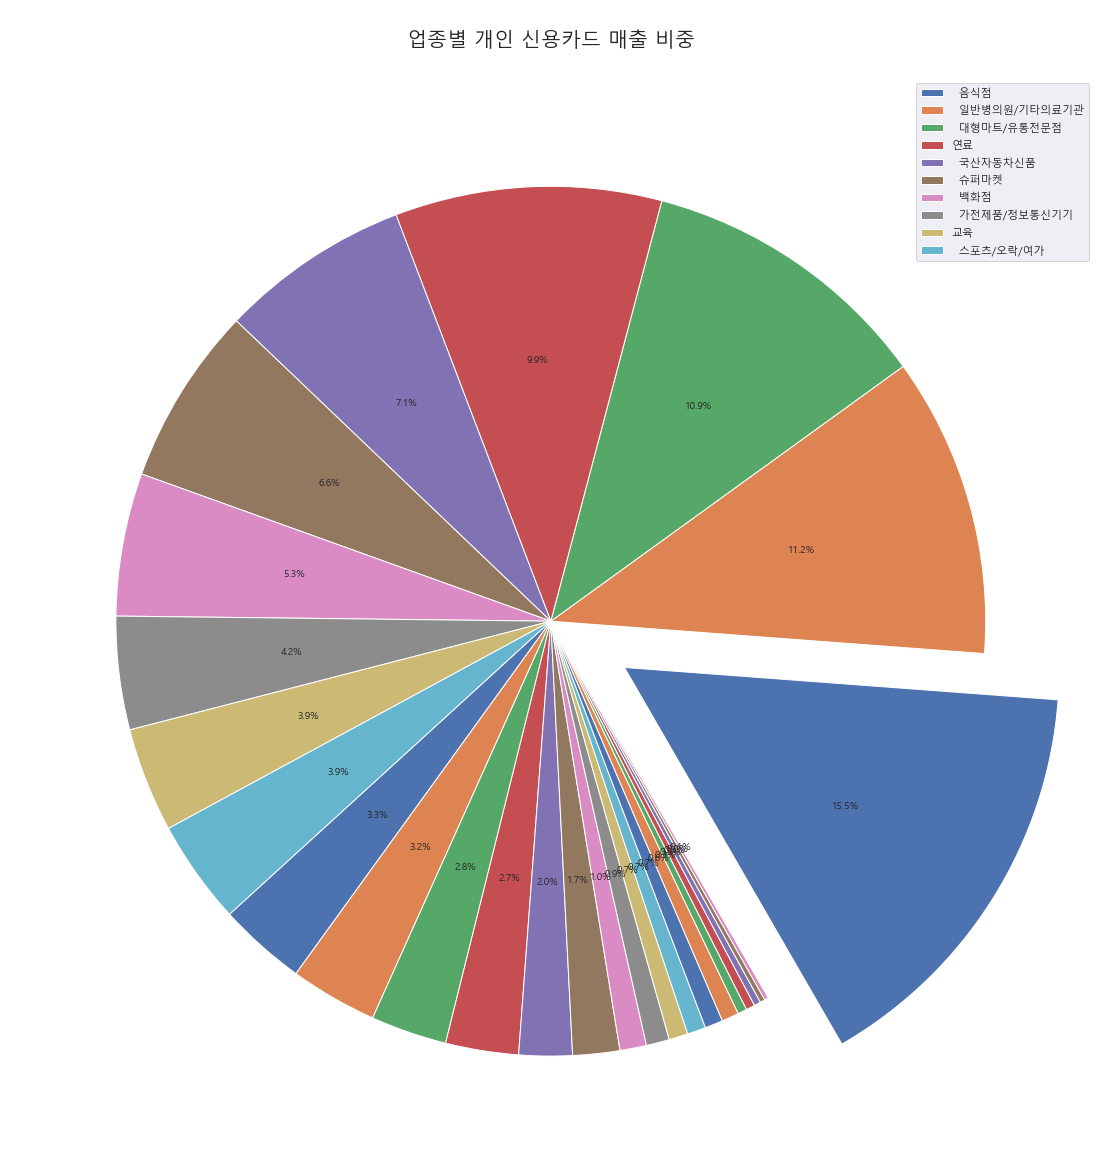

In [15]:
# 2021년 파이차트
plt.figure(figsize=(20,20))

df_card = card_2021['2021']
explode = [ 0.2 if df_card[i]==df_card.max() else 0 for i in range(len(df_card))]

plt.pie(df_card,
        explode = explode,
#         labels  = df_card.index,
        autopct = '%.1f%%',
        shadow  = False,
        startangle = -60
       )
plt.legend(df_card.index[:10], loc=1)
plt.title("\n업종별 개인 신용카드 매출 비중\n", fontsize=20)

plt.show()

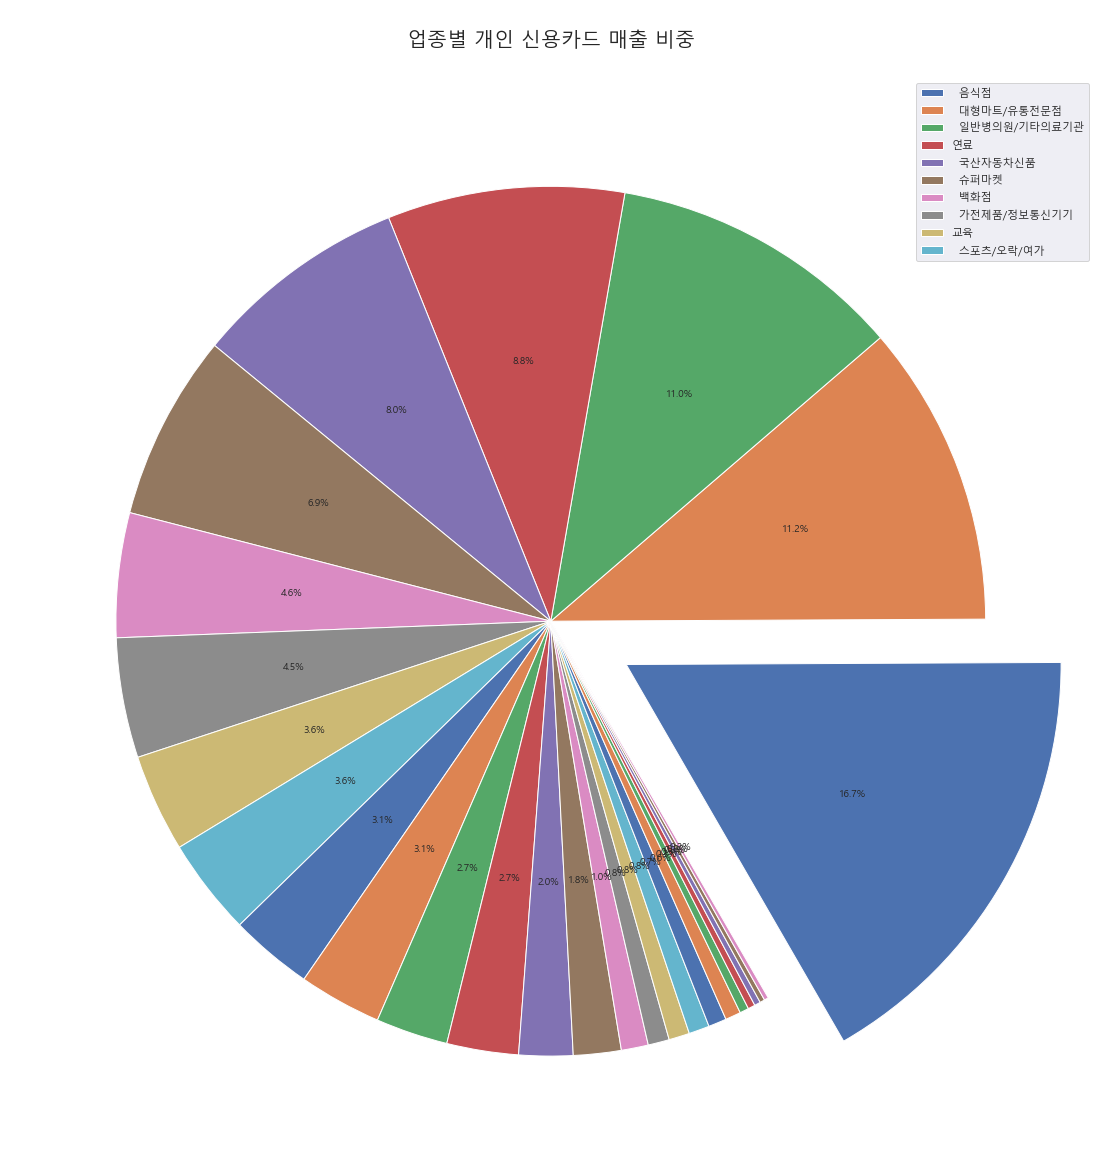

In [16]:
# 2020년 파이차트
plt.figure(figsize=(20,20))

df_card = card_2020['2020']
explode = [ 0.2 if df_card[i]==df_card.max() else 0 for i in range(len(df_card))]

plt.pie(df_card,
        explode = explode,
#         labels  = df_card.index,
        autopct = '%.1f%%',
        shadow  = False,
        startangle = -60
       )
plt.legend(df_card.index[:10], loc=1)
plt.title("\n업종별 개인 신용카드 매출 비중\n", fontsize=20)

plt.show()

In [17]:
# 년도별 차트 함수

def draw_card(param):
    if param == '2019':
        df_card = card_2019['2019']
        explode = [ 0.2 if df_card[i]==df_card.max() else 0 for i in range(len(df_card))]

        plt.pie(df_card,
                explode = explode,
        #         labels  = df_card.index,
                autopct = '%.1f%%',
                shadow  = False,
                startangle = -60
               )
#         plt.legend(df_card.index[:10], loc=1)
        plt.title("\n2019년 업종별 개인 신용카드 매출 비중\n", fontsize=20)
        
    elif param == '2020':
        df_card = card_2020['2020']
        explode = [ 0.2 if df_card[i]==df_card.max() else 0 for i in range(len(df_card))]

        plt.pie(df_card,
                explode = explode,
        #         labels  = df_card.index,
                autopct = '%.1f%%',
                shadow  = False,
                startangle = -60
               )
#         plt.legend(df_card.index[:10], loc=1)
        plt.title("\n2020년 업종별 개인 신용카드 매출 비중\n", fontsize=20)
        
    elif param == '2021':
        df_card = card_2020['2021']
        explode = [ 0.2 if df_card[i]==df_card.max() else 0 for i in range(len(df_card))]

        plt.pie(df_card,
                explode = explode,
        #         labels  = df_card.index,
                autopct = '%.1f%%',
                shadow  = False,
                startangle = -60
               )
#         plt.legend(df_card.index[:10], loc=1)
        plt.title("\n2021년 업종별 개인 신용카드 매출 비중\n", fontsize=20)
        
    else:
        print("Not Operation !!")
        return

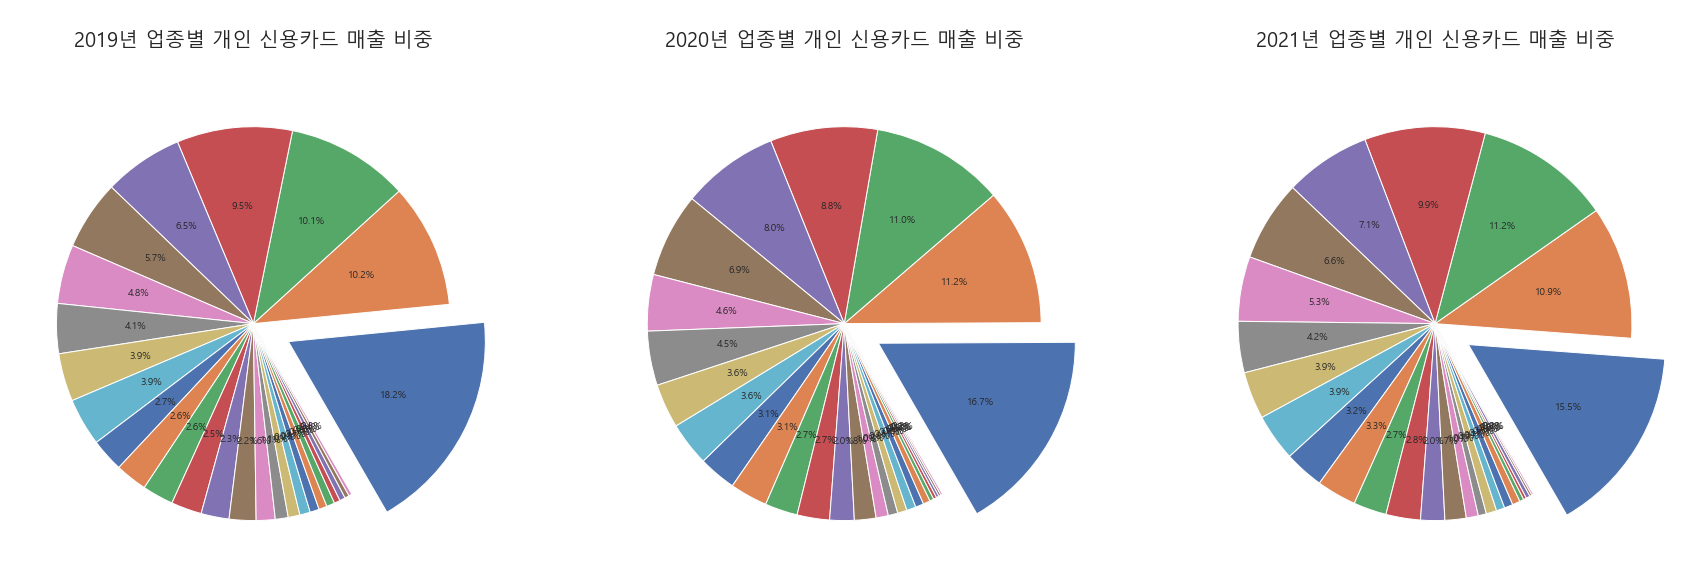

In [18]:
# subplot 차트
plt.figure(figsize=(30, 30))

plt.subplot(131)
draw_card('2019')

plt.subplot(132)
draw_card('2020')

plt.subplot(133)
draw_card('2021')

In [19]:
# card_year = card_df.head(1)
# card_year

In [20]:
'''추가해야할것
1. 소비유형코드 : 공백 없애기
'''

'추가해야할것\n1. 소비유형코드 : 공백 없애기\n'

# Step2-1. 방문고객 수 추이

In [21]:
# 엑셀파일 불러오기
data_visit_xls = 'data\data_visit.xlsx'

In [22]:
# 컬럼명이 같아서 2018.1 2018.2 ... 이렇게 나와서 컬럼 지정해서 가져옴
# visit_df = pd.read_excel(data_visit_xls, usecols = [0,20,40,60])
visit_df = pd.read_excel(data_visit_xls, usecols = "A,U,AO,BI")
visit_df = visit_df[visit_df['특성별(1)'] == '전체']
visit_df.head()

,특성별(1),2019.5,2020.5,2021.5
2,전체,54.1,47.7,41.8


In [23]:
visit_df.rename(columns = {'2019.5':'2019','2020.5':'2020','2021.5':'2021'},inplace=True)
visit_df.set_index('특성별(1)', inplace=True)   
visit_df

,2019,2020,2021
특성별(1),,,
전체,54.1,47.7,41.8


In [24]:
visit_t_df = visit_df.T
visit_t_df.rename(columns={'전체':'방문고객수(명)'}, inplace=True )
visit_t_df

특성별(1),방문고객수(명)
2019,54.1
2020,47.7
2021,41.8


# Step2-2. 배달앱, 배달대행 추이

### 배달앱

In [25]:
# 엑셀파일 불러오기
data_dlvry_xls = 'data\data_delivery.xlsx'

In [26]:
# 컬럼명이 같아서 2018.1 2018.2 ... 이렇게 나와서 컬럼 지정해서 가져옴
# dlvry_df = pd.read_excel(data_dlvry_xls, usecols = [0,19,33,49])
app_df = pd.read_excel(data_dlvry_xls, usecols = "A,T,AH,AX")
app_df.head()

,특성별(1),2019,2020,2021
0,특성별(1),배달앱,배달앱,배달앱
1,특성별(1),이용여부 (%),이용여부 (%),이용여부 (%)
2,특성별(1),예,예,예
3,전체,11.2,19.9,29.5
4,업종별,9.4,17,26.5


In [27]:
app_df = app_df[app_df['특성별(1)'] == '전체']
app_df.head()

,특성별(1),2019,2020,2021
3,전체,11.2,19.9,29.5


In [28]:
app_df.set_index('특성별(1)', inplace=True)   
app_df

,2019,2020,2021
특성별(1),,,
전체,11.2,19.9,29.5


In [29]:
app_t_df = app_df.T
app_t_df

특성별(1),전체
2019,11.2
2020,19.9
2021,29.5


In [30]:
app_t_df.rename(columns={'전체':'배달앱이용(%)'}, inplace=True )
app_t_df

특성별(1),배달앱이용(%)
2019,11.2
2020,19.9
2021,29.5


###  2019, 2020, 2021을 str으로 만들기 위한 과정

In [31]:
app_t_df.index

Index([2019, 2020, 2021], dtype='object')

In [32]:
app_t_df.reset_index(inplace=True)

In [33]:
app_t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     3 non-null      int64 
 1   배달앱이용(%)  3 non-null      object
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


In [34]:
app_t_df.rename(columns={'index':'년도'}, inplace=True )

In [35]:
app_t_df

특성별(1),년도,배달앱이용(%)
0,2019,11.2
1,2020,19.9
2,2021,29.5


In [36]:
# series에서만 str으로 바뀐 상태임 -> int형태의 '년도'컬럼을 삭제 후 바꾼 series를 concat하여 다시 붙여야함
app = app_t_df['년도'].astype(np.str_)
app

0    2019
1    2020
2    2021
Name: 년도, dtype: object

In [37]:
app_t_df

특성별(1),년도,배달앱이용(%)
0,2019,11.2
1,2020,19.9
2,2021,29.5


In [38]:
del app_t_df['년도']

In [39]:
app_t_df

특성별(1),배달앱이용(%)
0,11.2
1,19.9
2,29.5


In [40]:
app_t_df.index, app.index

(RangeIndex(start=0, stop=3, step=1), RangeIndex(start=0, stop=3, step=1))

In [41]:
app_t_df = pd.concat([app_t_df, app], axis=1)
app_t_df

,배달앱이용(%),년도
0,11.2,2019
1,19.9,2020
2,29.5,2021


In [42]:
app_t_df.set_index('년도', inplace=True)
app_t_df

,배달앱이용(%)
년도,
2019,11.2
2020,19.9
2021,29.5


In [43]:
type(app_t_df.index[0]), app_t_df.index[0]

(str, '2019')

In [44]:
app_t_df.index[2]

'2021'

In [45]:
app_t_df.index

Index(['2019', '2020', '2021'], dtype='object', name='년도')

In [46]:
df1 = pd.concat([visit_t_df, app_t_df], axis=1)
df1

,방문고객수(명),배달앱이용(%)
2019,54.1,11.2
2020,47.7,19.9
2021,41.8,29.5


### 배달대행

In [47]:
# 컬럼명이 같아서 2018.1 2018.2 ... 이렇게 나와서 컬럼 지정해서 가져옴
dae_df = pd.read_excel(data_dlvry_xls, usecols = "A,AA,AP,BE")
dae_df = dae_df[dae_df['특성별(1)'] == '전체']
dae_df.head()

,특성별(1),2019.7,2020.8,2021.7
3,전체,10,15.4,18.5


In [48]:
dae_df.rename(columns = {'2019.7':'2019','2020.8':'2020','2021.7':'2021'},inplace=True)
dae_df.set_index('특성별(1)', inplace=True)   
dae_df

,2019,2020,2021
특성별(1),,,
전체,10,15.4,18.5


In [49]:
dae_t_df = dae_df.T
dae_t_df.rename(columns={'전체':'배달대행이용(%)'}, inplace=True )
dae_t_df

특성별(1),배달대행이용(%)
2019,10
2020,15.4
2021,18.5


In [50]:
type(dae_t_df.index[0]), dae_t_df.index[0]

(str, '2019')

In [51]:
df2 = pd.concat([df1, dae_t_df], axis=1)
df2

,방문고객수(명),배달앱이용(%),배달대행이용(%)
2019,54.1,11.2,10
2020,47.7,19.9,15.4
2021,41.8,29.5,18.5


# Step2-3. 포스단말기 무인주문기 추이

### 포스단말기

In [52]:
# 엑셀파일 불러오기
data_pos_xls = 'data\data_pos.xlsx'

In [53]:
# 컬럼명이 같아서 2018.1 2018.2 ... 이렇게 나와서 컬럼 지정해서 가져옴
pos_df = pd.read_excel(data_pos_xls, usecols = [0,8,12,16])
pos_df = pos_df[pos_df['특성별(1)'] == '전체']
pos_df.head()

,특성별(1),2019,2020,2021
2,전체,88,88.2,89.2


In [54]:
pos_df.rename(columns = {'2019':'2019','2020':'2020','2021':'2021'},inplace=True)
pos_df.set_index('특성별(1)', inplace=True)     
pos_df

,2019,2020,2021
특성별(1),,,
전체,88,88.2,89.2


In [55]:
pos_t_df = pos_df.T
pos_t_df.rename(columns={'전체':'포스단말기이용(%)'}, inplace=True )
pos_t_df

특성별(1),포스단말기이용(%)
2019,88
2020,88.2
2021,89.2


In [56]:
pos_t_df.reset_index(inplace=True)

In [57]:
pos_t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       3 non-null      int64 
 1   포스단말기이용(%)  3 non-null      object
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


In [58]:
pos_t_df.rename(columns={'index':'년도'}, inplace=True )

In [59]:
pos_t_df

특성별(1),년도,포스단말기이용(%)
0,2019,88
1,2020,88.2
2,2021,89.2


In [60]:
pos = pos_t_df['년도'].astype(np.str_)
pos

0    2019
1    2020
2    2021
Name: 년도, dtype: object

In [61]:
pos_t_df

특성별(1),년도,포스단말기이용(%)
0,2019,88
1,2020,88.2
2,2021,89.2


In [62]:
del pos_t_df['년도']
pos_t_df

특성별(1),포스단말기이용(%)
0,88
1,88.2
2,89.2


In [63]:
pos_t_df.index, pos.index

(RangeIndex(start=0, stop=3, step=1), RangeIndex(start=0, stop=3, step=1))

In [64]:
pos_t_df = pd.concat([pos_t_df, pos], axis=1)
pos_t_df

,포스단말기이용(%),년도
0,88,2019
1,88.2,2020
2,89.2,2021


In [65]:
pos_t_df.set_index('년도', inplace=True)
pos_t_df

,포스단말기이용(%)
년도,
2019,88
2020,88.2
2021,89.2


In [66]:
df3 = pd.concat([df2, pos_t_df], axis=1)
df3

,방문고객수(명),배달앱이용(%),배달대행이용(%),포스단말기이용(%)
2019,54.1,11.2,10,88
2020,47.7,19.9,15.4,88.2
2021,41.8,29.5,18.5,89.2


### 무인키오스크

In [67]:
# 컬럼명이 같아서 2018.1 2018.2 ... 이렇게 나와서 컬럼 지정해서 가져옴
# muin_df = pd.read_excel(data_pos_xls, usecols = [0,10,14,18])
muin_df = pd.read_excel(data_pos_xls, usecols = "A,K,O,S")
muin_df = muin_df[muin_df['특성별(1)'] == '전체']
muin_df.head()

,특성별(1),2019.2,2020.2,2021.2
2,전체,1.5,3.1,4.5


In [68]:
muin_df.rename(columns = {'2019.2':'2019','2020.2':'2020','2021.2':'2021'},inplace=True)
muin_df.set_index('특성별(1)', inplace=True)   
muin_df

,2019,2020,2021
특성별(1),,,
전체,1.5,3.1,4.5


In [69]:
muin_t_df = muin_df.T
muin_t_df.rename(columns={'전체':'키오스크이용(%)'}, inplace=True )
muin_t_df

특성별(1),키오스크이용(%)
2019,1.5
2020,3.1
2021,4.5


In [70]:
type(muin_t_df.index[0])

str

In [71]:
final = pd.concat([df3, muin_t_df], axis=1)
final

,방문고객수(명),배달앱이용(%),배달대행이용(%),포스단말기이용(%),키오스크이용(%)
2019,54.1,11.2,10,88,1.5
2020,47.7,19.9,15.4,88.2,3.1
2021,41.8,29.5,18.5,89.2,4.5


# Step3. Chart 생성

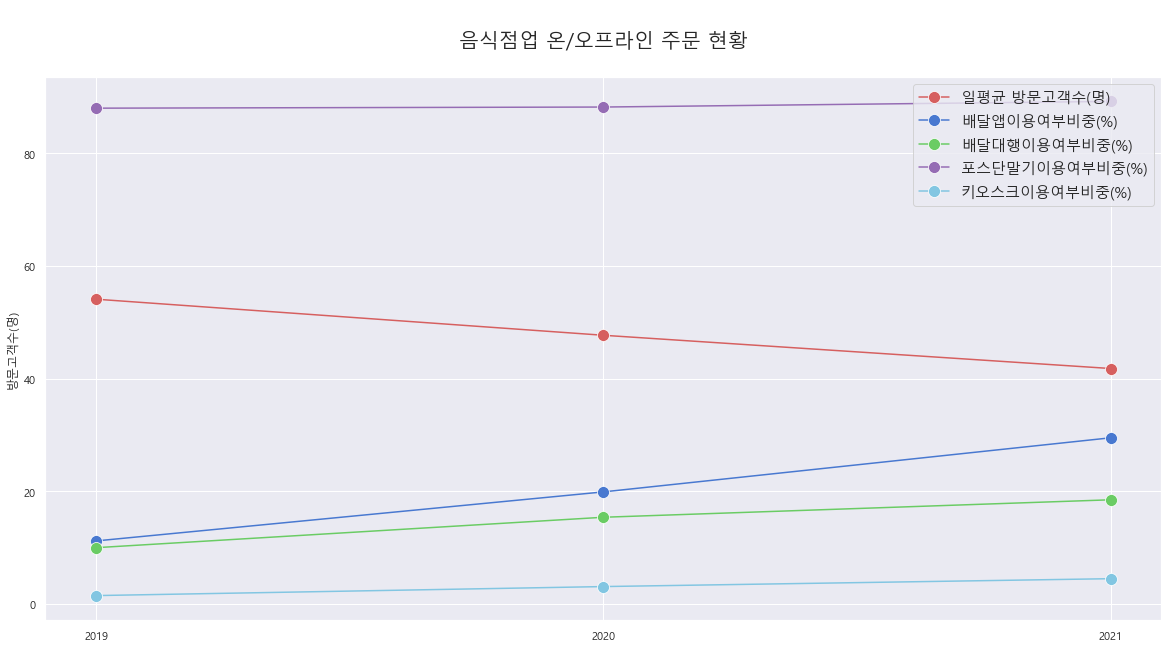

In [72]:
plt.figure(figsize=(20,10))

sns.set_color_codes("pastel")
sns.lineplot(x=final.index, y=final['방문고객수(명)'], color="r", marker='o', markersize=12, label='일평균 방문고객수(명)')

sns.set_color_codes("pastel")
sns.lineplot(x=final.index, y=final['배달앱이용(%)'], color="b", marker='o', markersize=12, label='배달앱이용여부비중(%)')

sns.set_color_codes("muted")
sns.lineplot(x=final.index, y=final['배달대행이용(%)'], color="g", marker='o', markersize=12, label='배달대행이용여부비중(%)')

sns.set_color_codes("muted")
sns.lineplot(x=final.index, y=final['포스단말기이용(%)'], color="m", marker='o', markersize=12, label='포스단말기이용여부비중(%)')

sns.set_color_codes("muted")
sns.lineplot(x=final.index, y=final['키오스크이용(%)'], color="c", marker='o', markersize=12, label='키오스크이용여부비중(%)')


plt.legend(ncol=1, loc=1, fontsize=15, frameon=True)
plt.title('\n 음식점업 온/오프라인 주문 현황 \n', fontsize=20)

plt.show()